In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the Dataset
# Load the Iris dataset
df = pd.read_csv('Iris.csv')
df.drop(columns=['Id'], inplace=True)  # Dropping 'Id' as it is not useful

### Dimensionality Reduction
- Using Principal Component Analysis (PCA) to visualize data in two dimensions:

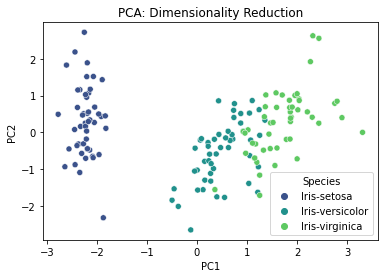

In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = df['Species']

# Plotting PCA results
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Species', palette='viridis')
plt.title('PCA: Dimensionality Reduction')
plt.show()

### Check Data Distribution and Statistics

#### 1. Check Skewness and Kurtosis

In [3]:
for col in df.columns[:-1]:  # Exclude 'Species'
    print(f"{col}:")
    print(f"Skewness: {skew(df[col]):.2f}, Kurtosis: {kurtosis(df[col]):.2f}\n")

SepalLengthCm:
Skewness: 0.31, Kurtosis: -0.57

SepalWidthCm:
Skewness: 0.33, Kurtosis: 0.24

PetalLengthCm:
Skewness: -0.27, Kurtosis: -1.40

PetalWidthCm:
Skewness: -0.10, Kurtosis: -1.34



#### 2. Check Distribution Plots

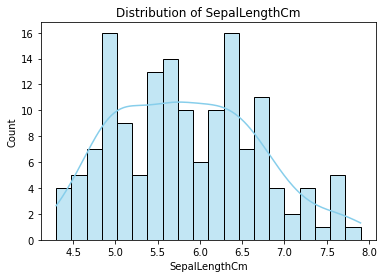

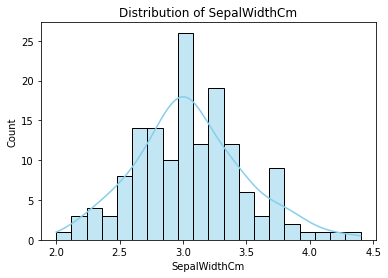

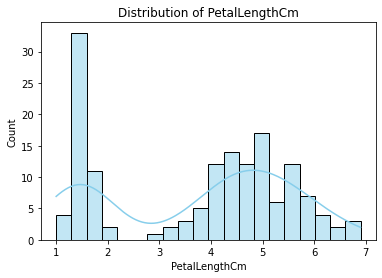

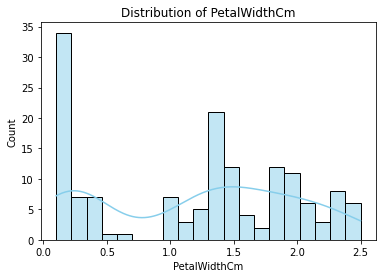

In [4]:
for col in df.columns[:-1]:
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

#### 3. Pairplot to Visualize Pairwise Relationships

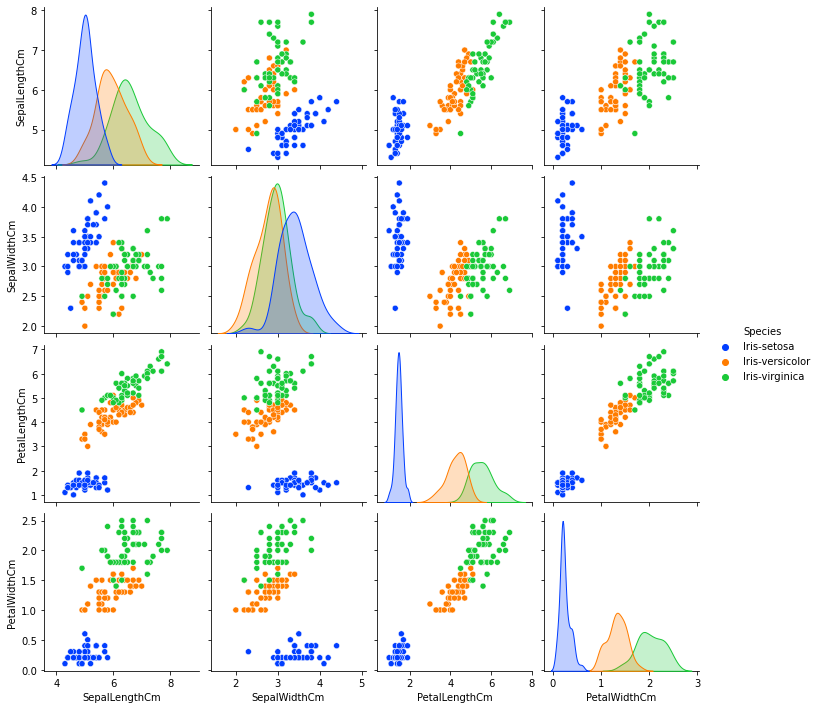

In [5]:
sns.pairplot(df, hue='Species', palette='bright')
plt.show()

## Outlier Detection

#### Boxplots for Outlier Analysis

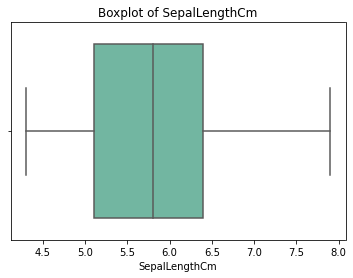

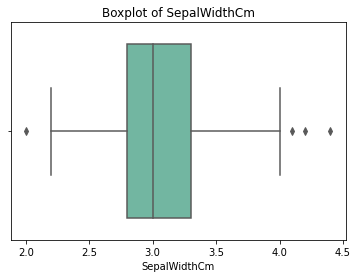

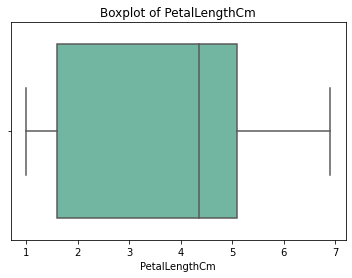

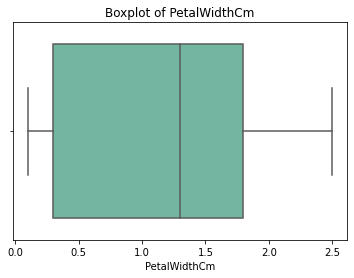

In [6]:
for col in df.columns[:-1]:
    sns.boxplot(data=df, x=col, palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.show()

## Feature Scaling and Correlation Analysis

#### 1. Normalize the Data

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])

#### 2. Correlation Heatmap

<AxesSubplot:>

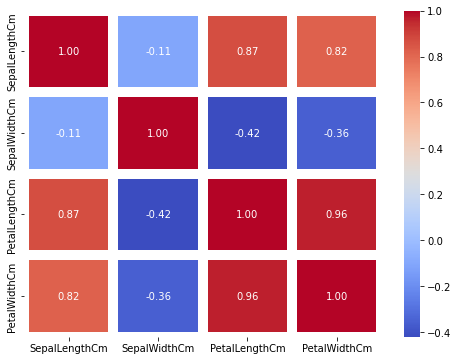

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=10)

#### 3. Check for Multicollinearity

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Feature,VIF
0,SepalLengthCm,264.745711
1,SepalWidthCm,97.111606
2,PetalLengthCm,173.968965
3,PetalWidthCm,55.488689


### Interaction Effects Between Features
- Analyze how two features jointly affect the target variable.
- This analysis can reveal complex patterns, such as non-linear separability.

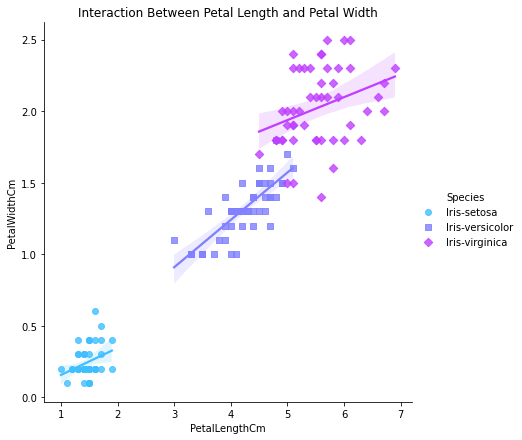

In [12]:
sns.lmplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue="Species", markers=["o", "s", "D"], palette="cool", height=6)
plt.title("Interaction Between Petal Length and Petal Width")
plt.show()

### Feature Importance with Tree-Based Models
- Tree-based models are excellent for assessing feature importance. For example, using a Random Forest Classifier.
- This helps identify the most critical predictors of species.

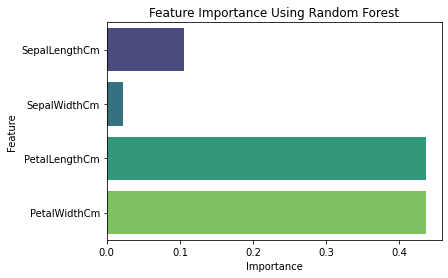

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Train a Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance Using Random Forest')
plt.show()

### Clustering Analysis
- Even though the target variable is available, clustering helps to validate how well-separated the species are:

#### K-Means Clustering

-The silhouette score measures clustering quality.

Silhouette Score: 0.553


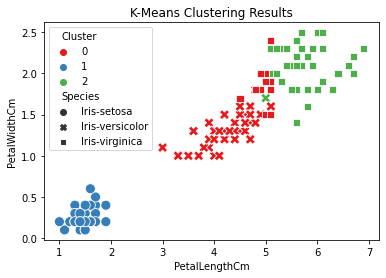

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Silhouette Score
sil_score = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

# Visualization
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Cluster', palette='Set1', style='Species', s=100)
plt.title('K-Means Clustering Results')
plt.show()

### Advanced Dimensionality Reduction with t-SNE
- t-SNE provides non-linear dimensionality reduction for visualizing high-dimensional data in 2D.
- t-SNE reveals non-linear separability among species clusters.

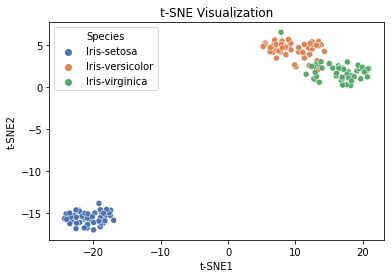

In [15]:
from sklearn.manifold import TSNE

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# Create a t-SNE DataFrame
tsne_df = pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2'])
tsne_df['Species'] = df['Species']

# Plot
sns.scatterplot(data=tsne_df, x='t-SNE1', y='t-SNE2', hue='Species', palette='deep')
plt.title('t-SNE Visualization')
plt.show()

###  Hypothesis Testing for Feature Differences
- Performing ANOVA (Analysis of Variance) to statistically confirm whether features differ significantly between species.
- A low p-value (<0.05) confirms significant differences among species.

In [16]:
from scipy.stats import f_oneway

# ANOVA for all features
for col in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    f_stat, p_val = f_oneway(df[df['Species'] == 'Iris-setosa'][col],
                             df[df['Species'] == 'Iris-versicolor'][col],
                             df[df['Species'] == 'Iris-virginica'][col])
    print(f"ANOVA for {col}: F-statistic = {f_stat:.3f}, p-value = {p_val:.3e}")

ANOVA for SepalLengthCm: F-statistic = 119.265, p-value = 1.670e-31
ANOVA for SepalWidthCm: F-statistic = 47.364, p-value = 1.328e-16
ANOVA for PetalLengthCm: F-statistic = 1179.034, p-value = 3.052e-91
ANOVA for PetalWidthCm: F-statistic = 959.324, p-value = 4.377e-85


###  Interaction Visualizations

#### Radial Visualization of Feature Distributions

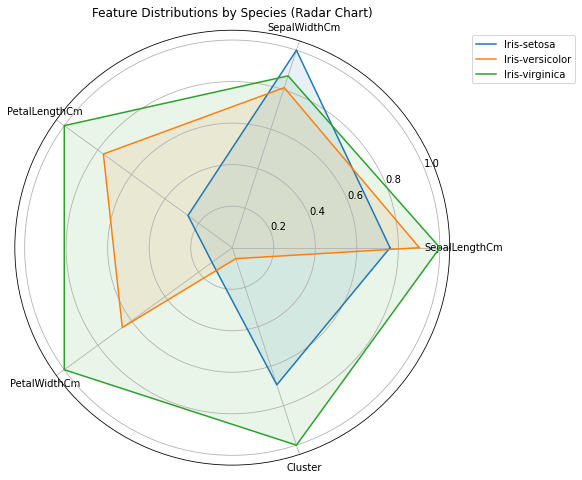

In [17]:
from math import pi

# Prepare data for radar chart
species_data = df.groupby('Species').mean().reset_index()
categories = list(species_data.columns[1:])

# Normalize values for plotting
normalized_data = species_data.copy()
for col in categories:
    normalized_data[col] = normalized_data[col] / species_data[col].max()

# Create radar plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

for i in range(len(normalized_data)):
    values = normalized_data.iloc[i, 1:].values.flatten().tolist()
    values += values[:1]  # repeat the first value to close the circle
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]
    ax.plot(angles, values, label=normalized_data['Species'][i])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks([n / float(len(categories)) * 2 * pi for n in range(len(categories))])
ax.set_xticklabels(categories)
plt.title('Feature Distributions by Species (Radar Chart)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

### Advanced Outlier Detection
Using Isolation Forest for advanced anomaly detection:

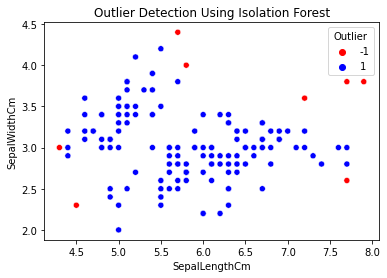

In [18]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Outlier'] = iso_forest.fit_predict(X)

# Visualize outliers
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Outlier', palette={1: 'blue', -1: 'red'})
plt.title('Outlier Detection Using Isolation Forest')
plt.show()

### Mutual Information for Feature Relevance
- Quantify the dependency of features on the target variable using mutual information.
- This ranks features based on their relevance to species classification.

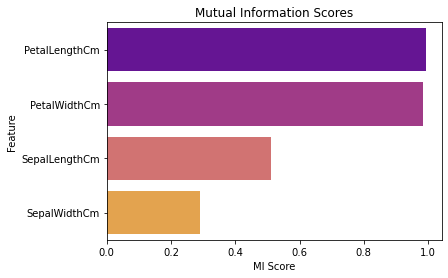

In [19]:
from sklearn.feature_selection import mutual_info_classif

# Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores_df.sort_values(by='MI Score', ascending=False, inplace=True)

# Plot Mutual Information Scores
sns.barplot(data=mi_scores_df, x='MI Score', y='Feature', palette='plasma')
plt.title('Mutual Information Scores')
plt.show()

### Cross-Feature Analysis with Parallel Coordinates
- Parallel coordinates allow for comparing feature distributions across species.

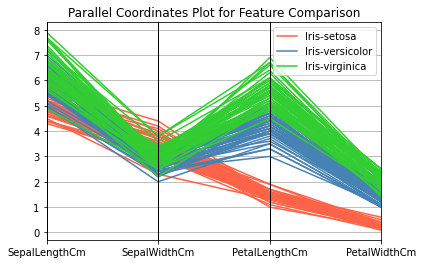

In [20]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, class_column='Species', cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], color=['#FF6347', '#4682B4', '#32CD32'])
plt.title('Parallel Coordinates Plot for Feature Comparison')
plt.show()

### Statistical Modeling
- Train a Logistic Regression model and assess separability
- This evaluates how well the features separate species.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X, y)

# Predictions and classification report
y_pred = log_reg.predict(X)
print(classification_report(y, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150

